# 03-2 선형회귀
k-최근접 이웃 회귀와 선형 회귀 알고리즘의 차이를 이해하고 사이킷런을 사용해 여러 가지 선형 회귀 모델을 만들어본다.

## k-최근접 이웃의 한계

In [1]:
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [2]:
from sklearn.model_selection import train_test_split

# 훈련 세트와 테스트 세트로 나눕니다.
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)
# 훈련 세트와 테스트 세트를 2차원 배열로 바꿉니다.
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

In [3]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=3)

# k-최근접 이웃 회귀 모델을 훈련합니다
knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

In [4]:
print(knr.predict([[50]]))

[1033.33333333]


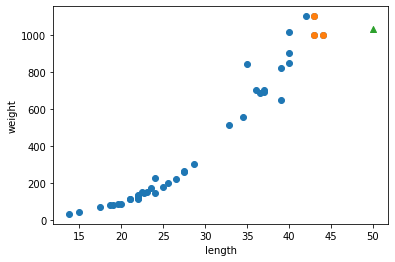

In [5]:
import matplotlib.pyplot as plt

# 50cm 농어의 이웃을 구합니다.
distances, indexes = knr.kneighbors([[50]])

# 훈련 세트의 산점도를 그립니다
plt.scatter(train_input, train_target)

# 훈련 세트 중에서 이웃 샘플만 다시 그립니다
plt.scatter(train_input[indexes], train_target[indexes])

# 50cm 농어 데이터
plt.scatter(50, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [6]:
print(np.mean(train_target[indexes]))
# 이웃 샘플의 타깃의 평균, 이는 모델이 예측했던 값과 정확히 일치한다.

1033.3333333333333


In [7]:
print(knr.predict([[100]]))
# 농어가 아무리 커도 무게가 더 늘어나지 않았다!?!?!?

[1033.33333333]


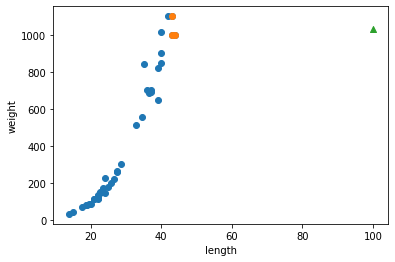

In [8]:
import matplotlib.pyplot as plt

# 100cm 농어의 이웃을 구합니다.
distances, indexes = knr.kneighbors([[100]])

# 훈련 세트의 산점도를 그립니다
plt.scatter(train_input, train_target)

# 훈련 세트 중에서 이웃 샘플만 다시 그립니다
plt.scatter(train_input[indexes], train_target[indexes])

# 100cm 농어 데이터
plt.scatter(100, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

## 선형 회귀
선형 회귀란 특성이 하나인 경우 어떤 직선을 학습하는 알고리즘

In [9]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# 선형 회귀 모델을 훈련합니다
lr.fit(train_input, train_target)

# 50cm 농어에 대해 예측합니다
print(lr.predict([[50]]))

[1241.83860323]


In [10]:
print(lr.coef_, lr.intercept_)
# y = ax+b = (lr.coef_)x + (lr.intercept_) 
# 여기서 coef_와 intercept_를 머신러닝 알고리즘이 찾은 값이라는 의미로 모델 파라미터라고 부른다.
# 이 책에서 사용하는 많은 머신러닝 알고리즘의 훈련 과정은 최적의 모델 파라미터를 찾는 것과 같다. 이를 모델 기반 학습이라 부른다.
# k-최근접 이웃에는 모델 파라미터가 없는데, 훈련 세트를 저장하는 것이 훈련의 전부였기 때문인데, 이를 사례 기반 학습이라 부른다.

[39.01714496] -709.0186449535477


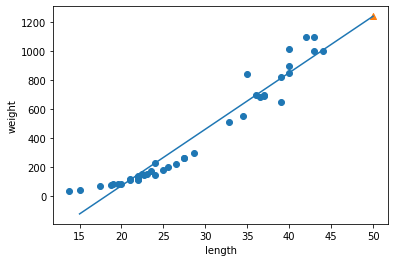

In [11]:
# 훈련 세트의 산점도를 그립니다
plt.scatter(train_input, train_target)

# 15에서 50까지 1차 방정식 그래프를 그립니다
plt.plot([15, 50], [15*lr.coef_ + lr.intercept_, 50*lr.coef_+lr.intercept_])

# 50cm 농어 데이터
plt.scatter(50, 1241.8, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [12]:
print(lr.score(train_input, train_target))  # 훈련 세트
print(lr.score(test_input, test_target))    # 테스트 세트

0.939846333997604
0.8247503123313558


## 다항 회귀
다항식을 사용한 선형 회귀

In [13]:
train_poly = np.column_stack((train_input**2, train_input))
test_poly = np.column_stack((test_input**2, test_input))

In [14]:
print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [15]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.predict([[50**2, 50]]))

[1573.98423528]


In [16]:
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.0502107827827


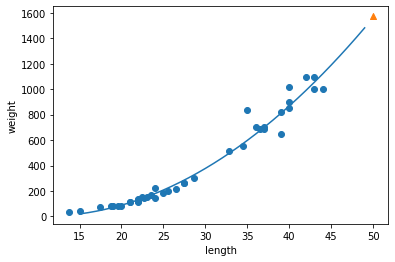

In [17]:
# 구간별 직선을 그리기 위해 15에서 49까지 정수 배열을 만듭니다
point = np.arange(15, 50)

# 훈련 세트의 산점도를 그립니다
plt.scatter(train_input, train_target)

# 15에서 49까지 2차 방정식 그래프를 그립니다
plt.plot(point, 1.01*point**2 - 21.6*point + 116.05)

# 50cm 농어 데이터
plt.scatter(50, 1574, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [18]:
print(lr.score(train_poly, train_target))  # 훈련 세트
print(lr.score(test_poly, test_target))    # 테스트 세트

0.9706807451768623
0.9775935108325122
